In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os, time

C:\Users\actruce\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [43]:
df = pd.read_csv('SAMSUNG.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6161 non-null   object 
 1   Open       6161 non-null   float64
 2   High       6161 non-null   float64
 3   Low        6161 non-null   float64
 4   Close      6161 non-null   float64
 5   Adj Close  6161 non-null   float64
 6   Volume     6161 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 337.1+ KB


In [45]:
df.drop(['Open','High','Low','Adj Close'],axis=1, inplace=True)

In [46]:
df.head()

,Date,Close,Volume
0,2000-01-04,6110.0,74195000
1,2000-01-05,5580.0,74680000
2,2000-01-06,5620.0,54390000
3,2000-01-07,5540.0,40305000
4,2000-01-10,5770.0,46880000


In [47]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6161 non-null   datetime64[ns]
 1   Close   6161 non-null   float64       
 2   Volume  6161 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 144.5 KB


In [48]:
df.set_index('Date', inplace=True)
df.head()

,Close,Volume
Date,,
2000-01-04,6110.0,74195000
2000-01-05,5580.0,74680000
2000-01-06,5620.0,54390000
2000-01-07,5540.0,40305000
2000-01-10,5770.0,46880000


#### asfreq 로 모든 날짜의 값을 채운다.

In [49]:
df.asfreq('D', method='ffill')

,Close,Volume
Date,,
2000-01-04,6110.0,74195000
2000-01-05,5580.0,74680000
2000-01-06,5620.0,54390000
2000-01-07,5540.0,40305000
2000-01-08,5540.0,40305000
...,...,...
2024-07-27,80900.0,14508334
2024-07-28,80900.0,14508334
2024-07-29,81200.0,12797136


#### 일별 변동률 계산 = ((오늘 종가)/(어제 종가) -1 )*100

In [50]:
df_dpc = (df['Close']/df['Close'].shift(1) - 1)*100
df_dpc

Date
2000-01-04         NaN
2000-01-05   -8.674304
2000-01-06    0.716846
2000-01-07   -1.423488
2000-01-10    4.151625
                ...   
2024-07-25   -1.951220
2024-07-26    0.621891
2024-07-29    0.370828
2024-07-30   -0.246305
2024-07-31    3.580247
Name: Close, Length: 6161, dtype: float64

In [51]:
df_dpc.iloc[0] = 0

#### 일간 변동률 누적곱 계산 (기하평균 계산) = ((100+일간변동률)/100).cumprod()*100 - 100
- 시작일을 언제로 하느냐에 따라 결과가 달라짐

출처: https://kwonkai.tistory.com/98 [주홍색 코딩:티스토리]

In [52]:
df_dpc_2000 = df_dpc
df_dpc_2010 = df_dpc.loc['2010':]
df_dpc_2020 = df_dpc.loc['2020':]
df_dpc_2024 = df_dpc.loc['2024':]

In [53]:
# cumprod = 일간변동률 누적곱
df_dpc_cp_2000 = ((100+df_dpc_2000)/100).cumprod()*100 - 100
df_dpc_cp_2010 = ((100+df_dpc_2010)/100).cumprod()*100 - 100
df_dpc_cp_2020 = ((100+df_dpc_2020)/100).cumprod()*100 - 100
df_dpc_cp_2024 = ((100+df_dpc_2024)/100).cumprod()*100 - 100

In [54]:
p_list = ['2000','2010','2020','2024']
df_dpc_cp_dict = {}
for p in p_list:
    df_dpc_p = df_dpc.loc[p:]
    df_dpc_p_cp = ((100+df_dpc_p)/100).cumprod()*100 - 100
    df_dpc_cp_dict[p] = df_dpc_p_cp

Text(0.5, 1.0, 'Cumulative Profit')

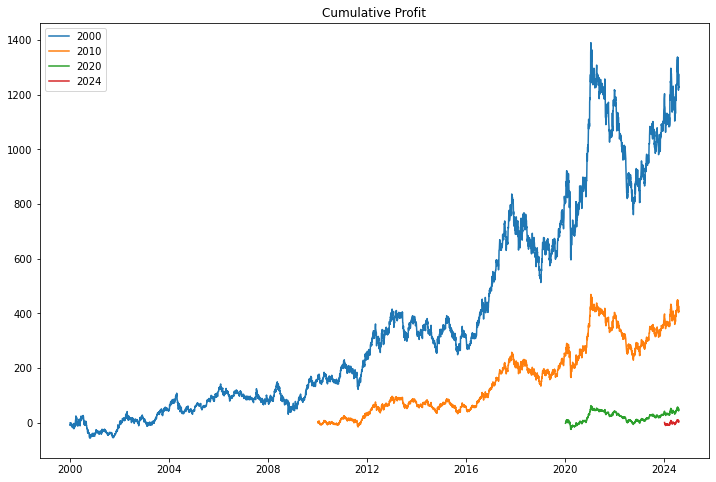

In [55]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()

for p, df_temp in zip(p_list, df_dpc_cp_dict.values()):
    ax.plot(df_temp, label=p)

ax.legend()
ax.set_title('Cumulative Profit')

In [57]:
df.loc['2024'].head()

,Close,Volume
Date,,
2024-01-02,79600.0,17142847
2024-01-03,77000.0,21753644
2024-01-04,76600.0,15324439
2024-01-05,76600.0,11304316
2024-01-08,76500.0,11088724


In [59]:
df.loc['2024'].tail()

,Close,Volume
Date,,
2024-07-25,80400.0,20323811
2024-07-26,80900.0,14508334
2024-07-29,81200.0,12797136
2024-07-30,81000.0,13169636
2024-07-31,83900.0,20744323


In [63]:
#2024-01-01 부터 2024-7-31까지 수익률
(df.loc['2024'].iloc[-1,0]/df.loc['2024'].iloc[0,0]-1)*100

5.402010050251249

In [64]:
#2020-01-01 부터 2024-7-31까지 수익률
(df.loc['2024'].iloc[-1,0]/df.loc['2020'].iloc[0,0]-1)*100

51.992753623188406

In [66]:
df.loc['2024'].iloc[-1,0], df.loc['2020'].iloc[0,0]-1

(83900.0, 55199.0)